# SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import linalg
from PIL import Image

In [2]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 実験用のデータ
「実験」という文字の画像をデータの系列（グレースケールなので[0, 0, 1, 1, 0 ...]のようなベクトルの集まり）に見立てて、特異値分解してみます。

ドキュメント：[https://docs.scipy.org/doc/scipy/tutorial/linalg.html](https://docs.scipy.org/doc/scipy/tutorial/linalg.html)

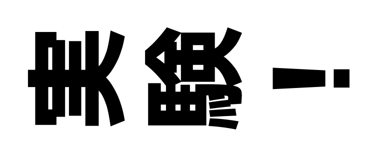

In [3]:
img = Image.open("./sample.png").convert("L").resize((163, 372)).rotate(90, expand=True)
img

# 特異値分解を実行

In [4]:
# 文字のデータが入った行列Aを特異値分解する
X = np.asarray(img)
U, Sigma, VT = linalg.svd(X, full_matrices=True)

print(f"A: {X.shape}, U: {U.shape}, Σ:{Sigma.shape}, V^T:{VT.shape}")

A: (163, 372), U: (163, 163), Σ:(163,), V^T:(372, 372)


# 低ランクで画像を近似

In [ ]:
# ランクを増やすと元の文字がより精密に復元される
for rank in [1, 2, 3, 4, 5, 10, 20, 50]:
    # rank番目までの要素を抽出
    U_i = U[:, :rank]
    Sigma_i = np.matrix(linalg.diagsvd(Sigma[:rank], rank, rank))
    VT_i = VT[:rank, :]

    # 画像を復元
    temp_image = np.asarray(U_i * Sigma_i * VT_i)
    Image.fromarray(np.uint8(temp_image))
    plt.title(f"rank={rank}")
    plt.imshow(temp_image, cmap="gray")
    plt.show()

# Vの中身

In [ ]:
total = np.zeros((163, 372))

for rank in [1, 2, 3, 4, 5]:
    # rank番目までの要素を抽出
    U_i = U[:, :rank]
    Sigma_i = np.matrix(linalg.diagsvd(Sigma[:rank], rank, rank))
    VT_i = VT[:rank, :]

    # rank番目の特異値以外をすべて０にして、rank番目の要素のみ残す
    if rank > 1:
        for ri in range(rank - 1):
            Sigma_i[ri, ri] = 0

    # 画像を復元
    temp_image = np.asarray(U_i * Sigma_i * VT_i)
    Image.fromarray(np.uint8(temp_image))

    # rank番目の要素のみを足す
    total += temp_image

    # rank番目までの要素で復元した画像と、行列Vのrank列目の値のプロットを比較してみる
    plt.figure(figsize=(5, 5))
    plt.suptitle(f"$u_{rank}$")
    plt.subplot(211)
    plt.imshow(temp_image, cmap="gray")
    plt.subplot(212)
    plt.plot(VT[0])
    plt.show()

In [ ]:
# 1~5番目の要素を足し合わせると、ちゃんと元の画像を復元できることを確認する
plt.imshow(total)